<a href="https://colab.research.google.com/github/VIVEK818713/Feature-Engineering/blob/main/8_Outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Outliers
##Outliers are the values that look different from the other values in the data. Below is a plot highlighting the outliers in ‘red’ and outliers can be seen in both the extremes of data.

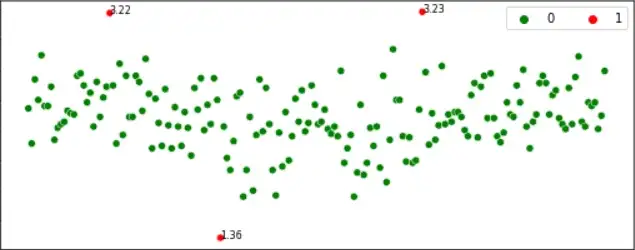

##No matter how careful you are during data collection, every data scientist has felt the frustration of finding outliers. An outlier is a data point that is noticeably different from the rest. 
##One cannot recognize outliers while collecting data; you won’t know what values are outliers until you begin analyzing the data.
##Many statistical tests are sensitive to outliers and therefore, the ability to detect them is an important part of data analytics.
##In fact, outliers sometimes can be helpful indicators. For example, in some applications of data analytics like credit card fraud detection, outlier analysis becomes important because here, the exception rather than the rule may be of interest to the analyst.
##Simplistically speaking, here are some options you have when you detect outliers: accept them, correct them or delete them. If there’s a chance that the outlier will not significantly alter the outcome, you may “accept” it. Otherwise, you can either ‘correct’ it or delete it. However, you should reserve deletion only for data points that are definitely wrong.
##Machine learning algorithms, too, are at risk to the statistics and distribution of the input variables. In supervised models, outliers can deceive the training process resulting in prolonged training times, or leading to the development of less precise models.
##like linear regression,logistic regression ,adaboost,KNN (for small value of K, KNN is sensitive to outliers),K Means,Hierarchical,PCA & deep learning are easily influenced by the outliers in the training data.

## Outiler treatment are of 2 type
##1. Trimming means you wil remove all the outliers rows but in this case it may you have large number of outlier then your data will be thin.
##2.Capping means you will replace outlier value either by maximum value or mininmum value.

##How to find the outliers? There is no one method to detect outliers because of the facts at the center of each dataset. One dataset is different from the other. A rule-of-the-thumb could be that you, the domain expert, can inspect the unfiltered, basic observations and decide whether a value is an outlier or not.
##There are more scientific methods, though. You can carry out two types of analysis to find outliers – uni-variate, which involves just one variable, and multi-variate. These are different outlier methods for outlier analysis:
##1.z-score
##2.IQR
##3.Percentile(Winsariztion)

#Z-score
##Z-score is just another form of standard deviation procedure. Z-score is used to convert the data into another dataset with mean = 0.
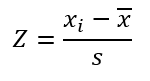

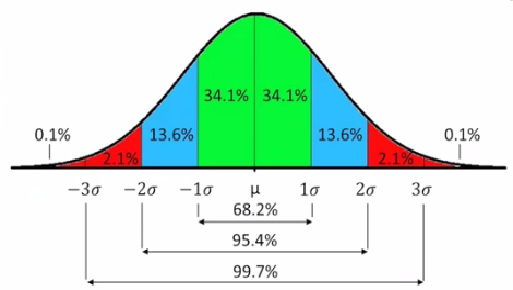

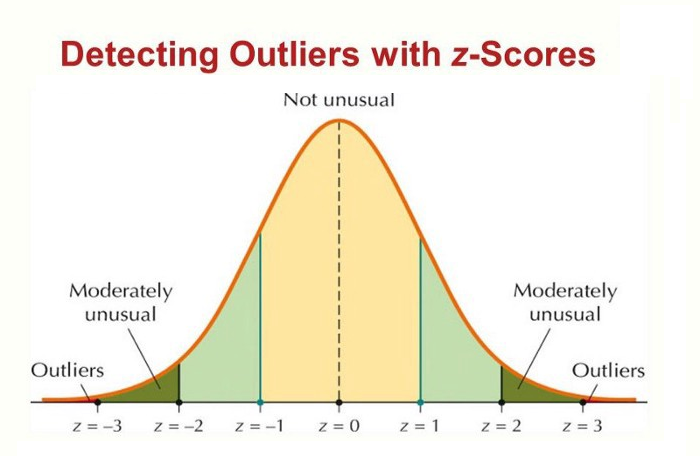

##Z-scores can determine how odd observation is when your data follow a normal distribution. Z-scores are the number of standard deviations above and below the mean decrease for each value. For example, a Z-score of 2 indicates that the observation is two standard deviations above the mean, while a Z-score of -2 indicates two standard deviations below the mean. The Z score of zero represents a value equal to the mean. To calculate the Z-score for the observation, take the original measurement, subtract the mean, and divide by the standard deviation. Mathematically, the formula for this process is: z = (X – μ) / σ

##hough Z-Score is a highly efficient way of detecting and removing outliers, we cannot use it with every data type. When we said that, we mean that it only works with the data which is completely or close to normally distributed, which in turn stimulates that this method is not for skewed data, either left skew or right skew.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/0machine learning/csv data/placement_student.csv')

In [ ]:
df.shape

In [ ]:
df.sample(5)

## Now we  have to check the ditribution of both the columns CGPA and PLACEMENT_EXAM_MARKS. and check which column has normal distribution. if a column has normal distribution then you can apply z-score technique but if data distribution is left skewd or right skewd then you should go for other technique.

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])

plt.show()

## CGPA has normal distributed then we are going to apply z-score on it.


## you can check placement_exam_marks skewness.

In [ ]:
df['placement_exam_marks'].skew()

## let's workon CGPA and calulate mean,std,min,max.

In [ ]:
print("Mean value of cgpa",df['cgpa'].mean())
print("Std value of cgpa",df['cgpa'].std())
print("Min value of cgpa",df['cgpa'].min())
print("Max value of cgpa",df['cgpa'].max())

# Finding the boundary values

In [ ]:
print("Highest allowed",df['cgpa'].mean() + 3*df['cgpa'].std())
print("Lowest allowed",df['cgpa'].mean() - 3*df['cgpa'].std())

# Finding the outliers

In [ ]:
df[(df['cgpa'] > 8.80) | (df['cgpa'] < 5.11)]

#Trimming

In [ ]:
new_df = df[(df['cgpa'] < 8.80) & (df['cgpa'] > 5.11)]
new_df

## Now check the shape

In [ ]:
new_df.shape

# Approach 2 doing same thing as we did above
## Calculating the Zscore.we apply formula
## z = (X – μ) / σ
## and create a new column cgpa_zscore

In [ ]:
df['cgpa_zscore'] = (df['cgpa'] - df['cgpa'].mean())/df['cgpa'].std()
df.head()

## calculate which is greater then 3 and less then 3

In [ ]:
df[df['cgpa_zscore'] > 3]

In [ ]:
df[df['cgpa_zscore'] < -3]

In [ ]:
df[(df['cgpa_zscore'] > 3) | (df['cgpa_zscore'] < -3)]

# Trimming 

In [ ]:
new_df = df[(df['cgpa_zscore'] < 3) & (df['cgpa_zscore'] > -3)]
new_df

In [ ]:
new_df.shape

#Capping

In [ ]:
upper_limit = df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3*df['cgpa'].std()

In [ ]:
upper_limit

In [ ]:
lower_limit

## now write down some code for capping we are using np.where .
## in np.where(x,y,z)
##x--->condition
##y---> if condition is true then replace it with y
##z---->if condition is false then execute z
## and we will store it in df['cgpa']

In [ ]:
df['cgpa'] = np.where(
    df['cgpa']>upper_limit,
    upper_limit,
    np.where(
        df['cgpa']<lower_limit,
        lower_limit,
        df['cgpa']
    )
)

In [ ]:
df.shape

In [ ]:
df['cgpa'].describe()

## our min and max value has been changed and we did not remove outliers we just repalce it by min and max value.

# Interquartile Range Rule(IQR) for outlier detection and removal
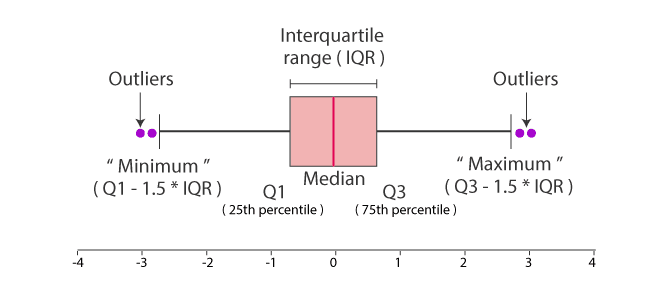

##Interquartile Range is just a mathematical way to find outliers. Box plots are based on these calculations only. All the data points from first quartile to third quartile are said to lie in the interquartile range. We subtract 1.5*IQR to find the minimum value below which all data points are considered as outliers whereas, we add 1.5*IQR to find the maximum value above which all the data points are considered as outliers. 

##In the above figure,

##minimum is the minimum value in the dataset,
##and maximum is the maximum value in the dataset.
##So the difference between the two tells us about the range of dataset.

##The median is the median (or centre point), also called second quartile, of the data (resulting from the fact that the data is ordered).
##Q1 is the first quartile of the data, i.e., to say 25% of the data lies between minimum and Q1.
##Q3 is the third quartile of the data, i.e., to say 75% of the data lies between minimum and Q3.
##The difference between Q3 and Q1 is called the Inter-Quartile Range or IQR.

##IQR = Q3 - Q1
##To detect the outliers using this method, we define a new range, let’s call it decision range, and any data point lying outside this range is considered as outlier and is accordingly dealt with. The range is as given below:

##Lower Bound: (Q1 - 1.5 * IQR)
##Upper Bound: (Q3 + 1.5 * IQR)
##Any data point less than the Lower Bound or more than the Upper Bound is considered as an outlier.

##Steps to perform Outlier Detection by identifying the lowerbound and upperbound of the data:
##1. Arrange your data in ascending order
##2. Calculate Q1 ( the first Quarter)
##3. Calculate Q3 ( the third Quartile)
##4. Find IQR = (Q3 - Q1)
##5. Find the lower Range = Q1 -(1.5 * IQR)
##6. Find the upper Range = Q3 + (1.5 * IQR)

#Once you get the upperbound and lowerbound, all you have to do is to delete any values which is less than lowerbound or greater than upperbound.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/0machine learning/csv data/placement_student.csv')

In [ ]:
df.max()

## check the distribution

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])

plt.show()

## As we know that IQR apply on the skewed data. so 'cgpa' is normaly distributed so no need to apply IQR in this field but 'placement_exam_marks' is right skewed so you can apply IQR on this column.

In [ ]:
df['placement_exam_marks'].describe()

## Let's draw boxpot for outliers

In [ ]:
sns.boxplot(df['placement_exam_marks'])

## we can see clearly there are some outliers

# Finding the IQR

## calculate 25percentile and 75 percentile

In [ ]:
percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75)

In [ ]:
percentile25

In [ ]:
percentile75

## calculate IQR=Q3-Q1

In [ ]:
iqr = percentile75 - percentile25

In [ ]:
iqr

## Calculate upper and lower value

In [ ]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [ ]:
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

##Finding Outliers

In [ ]:
df[df['placement_exam_marks'] > upper_limit]

## there are 15 value which are treated as outliers at the right side

In [ ]:
df[df['placement_exam_marks'] < lower_limit]

## there is no outiers at the lower limit

#Trimming

In [ ]:
new_df = df[df['placement_exam_marks'] < upper_limit]

In [ ]:
new_df.shape

## Now camparing distribution and box plot before and after trimming

In [ ]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.distplot(new_df['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_df['placement_exam_marks'])

plt.show()

## we remove almost outliers let's do capping

#Capping

In [ ]:
new_df_cap = df.copy()

new_df_cap['placement_exam_marks'] = np.where(
    new_df_cap['placement_exam_marks'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['placement_exam_marks'] < lower_limit,
        lower_limit,
        new_df_cap['placement_exam_marks']
    )
)

In [ ]:
new_df_cap.shape

# Comparing

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.distplot(new_df_cap['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['placement_exam_marks'])

plt.show()

#Percentile method(Winsorization )

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/0machine learning/csv data/Height-Weight.csv')

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df['Height'].describe()

In [ ]:
sns.distplot(df['Height'])

In [ ]:
sns.boxplot(df['Height'])

In [ ]:
upper_limit = df['Height'].quantile(0.99)
upper_limit

In [ ]:
lower_limit = df['Height'].quantile(0.01)
lower_limit

In [ ]:
new_df = df[(df['Height'] <= 74.78) & (df['Height'] >= 58.13)]

In [ ]:
new_df['Height'].describe()

In [ ]:
df['Height'].describe()

In [ ]:
sns.distplot(new_df['Height'])

In [ ]:
sns.boxplot(new_df['Height'])

# Capping --> Winsorization

In [ ]:
df['Height'] = np.where(df['Height'] >= upper_limit,
        upper_limit,
        np.where(df['Height'] <= lower_limit,
        lower_limit,
        df['Height']))

In [ ]:
df.shape

In [ ]:
df['Height'].describe()

In [ ]:
sns.distplot(df['Height'])

In [ ]:
sns.boxplot(df['Height'])